In [1]:
import json
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
#_creating default figure size of matplotlib
plt.rcParams['figure.figsize'] = 10.0, 5.0

In [3]:
def plot_line_graph(x_values, total_y_values, listener_y_values, visitor_y_values,x_label, y_label, title):
    plt.plot(x_values, total_y_values, label= 'Total Complexity')
    plt.plot(x_values, listener_y_values, label= 'Listener Complexity')
    plt.plot(x_values, visitor_y_values, label= 'Visitor Complexity')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()

In [69]:
def plot_bar_graph(x_values, listener_repo_cnt, visitor_repo_cnt, listener_visitor_repo_cnt):
    locations = np.arange(len(x_values)) 
    width = 0.15 #_considering width as size of each bar

    #_plotting bar graphs for each fruit frequency 
    plt.bar(locations - 0.15, listener_repo_cnt, width, label='Commits with Listener change', color = "orange", edgecolor = "k", hatch="/")
    plt.bar(locations , visitor_repo_cnt, width, label='Commits with Visitor change',  color = "green", edgecolor = "k", hatch=".")
    plt.bar(locations + 0.15, listener_visitor_repo_cnt, width, label='Commits with both Listener and Visitor change',  color = "blue", edgecolor = "k", hatch="\\")

    #_mapping x labels to the graph
    plt.xticks(np.arange(len(x_values)), x_values)
    plt.ylabel('No. of unique commits')
    plt.title('Commit frequencies of Antlr4 Patterns')
    plt.legend()
    plt.show()

In [52]:
def get_repo_pattern_cnt(commit_id_list, pattern_type):
    repo_commit_bar_df = repo_commit_df.loc[repo_commit_df['commit_group_id'].isin(commit_id_list)]
    if pattern_type == 'listener_visitor':
        repo_commit_bar_df = repo_commit_bar_df.loc[(repo_commit_bar_df['listener_complexity'] > 0) & (repo_commit_bar_df['visitor_complexity'] > 0)]
    else:
        repo_commit_bar_df = repo_commit_bar_df.loc[repo_commit_bar_df[pattern_type] > 0]
    return len(repo_commit_bar_df.index)

In [4]:
def get_commit_compleity_data(repo_id, commit):
    listener_complexity = 0
    visitor_complexity = 0
    for antlr_file in commit['_changed_files_list']:
        listener_complexity += (antlr_file['_enter_cnt'] + antlr_file['_exit_cnt'])
        visitor_complexity += antlr_file['_visit_cnt']
    return (repo_id, commit['_commit_index'], commit['_sha_id'], commit['_timestamp'], (listener_complexity + visitor_complexity), listener_complexity, visitor_complexity)

In [5]:
with open('final_repo_data.json', "r", encoding='utf-8', errors='ignore') as infile:
    repo_info_list = []
    repo_commit_data_list = []
    json_object_list = json.load(infile, strict=False)
    for repo in json_object_list:
        repo_info_list.append((repo['_repo_id'], repo['_repo_name'], repo['_total_commits'], len(repo['_commit_history'])))
        for commit in repo['_commit_history']:
            repo_commit_data_list.append(get_commit_compleity_data(repo['_repo_id'], commit))

In [6]:
repo_info_df = pd.DataFrame(repo_info_list, columns=['repo_index', 'repo_name', 'repo_total_commits', 'mined_commits'])
repo_info_df.set_index('repo_index', inplace=True)
repo_info_df.sort_values('repo_index', ascending=True, inplace=True)
repo_info_df

,repo_name,repo_total_commits,mined_commits
repo_index,,,
1,4455jkjh/Apktool-android,9,5
2,52Jolynn/SqlParser,36,10
3,Adrodoc/MPL,703,10
4,AlanHohn/antlr4-python,7,2
5,Andyccs/sqat,181,10
...,...,...,...
434,zendesk/maxwell,2965,10
435,zhegexiaohuozi/JsoupXpath,168,10
436,zhunki/skyfire,25,10


In [7]:
repo_info_df = repo_info_df.loc[repo_info_df['mined_commits'] > 9]
repo_info_df.shape

(411, 3)

In [8]:
repo_commit_df = pd.DataFrame(repo_commit_data_list, columns=['repo_index', 'commit_id', 'hash_id', 'timestamp', 'complexity', 'listener_complexity', 'visitor_complexity'])
repo_commit_df.sort_values(['repo_index', 'commit_id'], ascending=[True, True], inplace=True)
repo_commit_df

,repo_index,commit_id,hash_id,timestamp,complexity,listener_complexity,visitor_complexity
2165,1,1,2e0679cb43e155549d364529801c070fac311db1,2019-02-23 17:00:54+00:00,0,0,0
2166,1,4,8c212d9f4352788498e802acd961fed72ef6e35f,2019-02-24 20:53:29+08:00,50,0,50
2167,1,6,fb1f556579e93c7bd23a4a9bd946533043e618fc,2019-03-10 22:31:35+08:00,0,0,0
2168,1,7,6b6abb2bf9c6b0feccd658053a531cb75280e8f5,2019-04-08 19:10:33+08:00,111,0,111
2169,1,9,4c1841a582d1e79cb87d9221f948cf06a63e8384,2019-05-16 21:51:33+08:00,111,0,111
...,...,...,...,...,...,...,...
1062,438,8410,c1495c90bed45c74449027ab1a592af1841de7aa,2019-10-25 17:23:55+08:00,0,0,0
1063,438,8546,12837231c5af1f49d6850b1a1ec18cb6a4d3d696,2019-12-05 20:35:45+08:00,0,0,0
1064,438,8614,8cf5f080d69c1c7db9c63631dda73be311865f8e,2019-12-26 10:48:55+08:00,0,0,0
1065,438,8648,86a817f82e7a6be984b2ab9a43a3f67fd239db1c,2019-12-30 13:38:25+08:00,0,0,0


In [9]:
repo_index_list = list(repo_info_df.index)
repo_commit_df = repo_commit_df.loc[repo_commit_df['repo_index'].isin(repo_index_list)]
repo_commit_df.shape

(4110, 7)

In [10]:
commit_group_index_list = []
sample_list = range(1, 11)
for value in range(len(repo_info_df.index)):
    commit_group_index_list.extend(sample_list)
repo_commit_df['commit_group_id'] = commit_group_index_list
repo_commit_df.shape

/home/praveen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(4110, 8)

In [11]:
repo_complexity_df = repo_commit_df.groupby('repo_index', as_index=False)['complexity'].sum()
repo_complexity_df = repo_complexity_df.loc[repo_complexity_df['complexity'] != 0.0]
repo_complexity_df.shape

(264, 2)

In [13]:
repo_commit_df = repo_commit_df.loc[repo_commit_df['repo_index'].isin(repo_complexity_df.repo_index)]
repo_commit_df.shape

(2640, 8)

In [14]:
avg_commit_comp_df = repo_commit_df.groupby('commit_group_id', as_index=False)['complexity'].mean()
total_y_values = avg_commit_comp_df['complexity']
avg_commit_comp_df = repo_commit_df.groupby('commit_group_id', as_index=False)['listener_complexity'].mean()
listener_y_values = avg_commit_comp_df['listener_complexity']
avg_commit_comp_df = repo_commit_df.groupby('commit_group_id', as_index=False)['visitor_complexity'].mean()
visitor_y_values = avg_commit_comp_df['visitor_complexity']

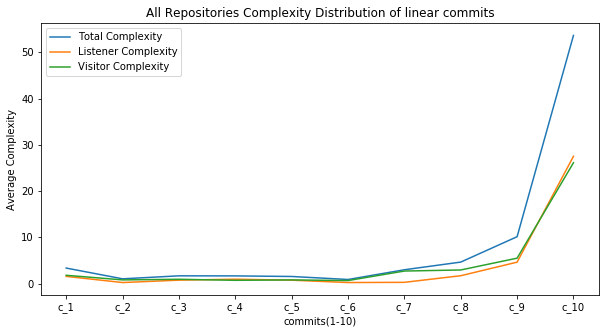

In [15]:
x_values = ['c_'+str(value) for value in avg_commit_comp_df['commit_group_id']]
plot_line_graph(x_values, total_y_values, listener_y_values, visitor_y_values, "commits(1-10)", "Average Complexity", "All Repositories Complexity Distribution of linear commits")

In [72]:
listener_repo_cnt = []
visitor_repo_cnt = []
listener_visitor_repo_cnt =  []

listener_repo_cnt.append(get_repo_pattern_cnt([5, 6, 7], 'listener_complexity'))
listener_repo_cnt.append(get_repo_pattern_cnt([9, 10], 'listener_complexity'))
visitor_repo_cnt.append(get_repo_pattern_cnt([5, 6, 7], 'visitor_complexity'))
visitor_repo_cnt.append(get_repo_pattern_cnt([9, 10], 'visitor_complexity'))
listener_visitor_repo_cnt.append(get_repo_pattern_cnt([5, 6, 7], 'listener_visitor'))
listener_visitor_repo_cnt.append(get_repo_pattern_cnt([9, 10], 'listener_visitor'))

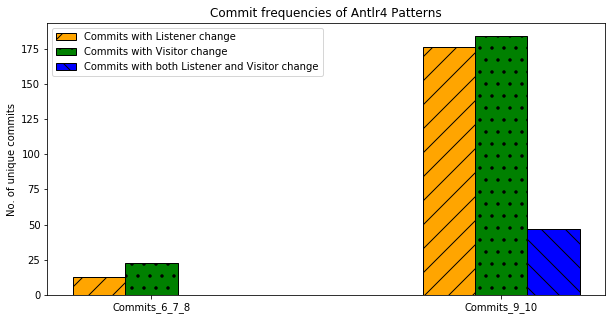

In [73]:
x_values_bar_graph = ['Commits_6_7_8', 'Commits_9_10']
plot_bar_graph(x_values_bar_graph, listener_repo_cnt, visitor_repo_cnt, listener_visitor_repo_cnt)